In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,lyrics,artist_name
The Beatles,it be twenty year ago today sergeant pepper ta...,The Beatles
The Rolling Stones,oh yeah i hear you talk when im on the street ...,The Rolling Stones
Elton John,the rose in the window box have tilt to one si...,Elton John
Mariah Carey,oh now you can have me when you want me you si...,Mariah Carey
Madonna,life be a mystery everyone must stand alone i ...,Madonna
Michael Jackson,i say you wan na be startin somethin you get t...,Michael Jackson
Taylor Swift,there somethin bout the way the street look wh...,Taylor Swift
Stevie Wonder,spoken by sw when you say that you kill in the...,Stevie Wonder
Whitney Houston,i found out what ive be miss always on the run...,Whitney Houston
Elvis Presley,well it one for the money two for the show thr...,Elvis Presley


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data

,lyrics,artist_name,polarity,subjectivity
The Beatles,it be twenty year ago today sergeant pepper ta...,The Beatles,0.073150,0.547043
The Rolling Stones,oh yeah i hear you talk when im on the street ...,The Rolling Stones,0.076326,0.522489
Elton John,the rose in the window box have tilt to one si...,Elton John,0.086476,0.468086
Mariah Carey,oh now you can have me when you want me you si...,Mariah Carey,0.130307,0.544073
Madonna,life be a mystery everyone must stand alone i ...,Madonna,0.151577,0.511684
Michael Jackson,i say you wan na be startin somethin you get t...,Michael Jackson,0.084782,0.554159
Taylor Swift,there somethin bout the way the street look wh...,Taylor Swift,0.076304,0.530092
Stevie Wonder,spoken by sw when you say that you kill in the...,Stevie Wonder,0.152762,0.554763
Whitney Houston,i found out what ive be miss always on the run...,Whitney Houston,0.167922,0.548756
Elvis Presley,well it one for the money two for the show thr...,Elvis Presley,0.155998,0.569919


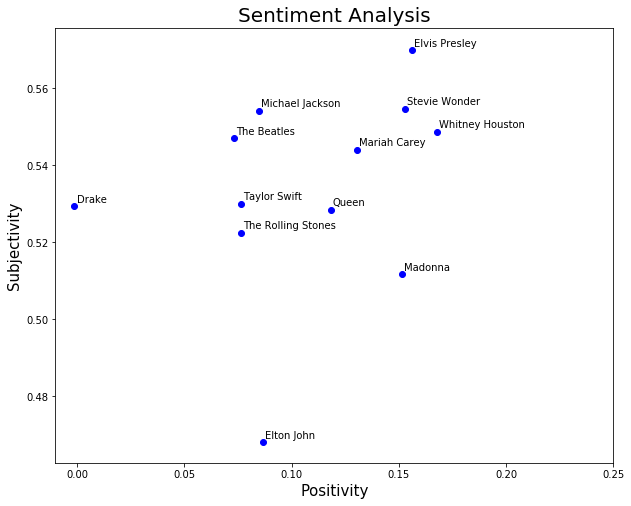

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, artist in enumerate(data.index):
    x = data.polarity.loc[artist]
    y = data.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['artist_name'][index], fontsize=10)
    plt.xlim(-.01, .25)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Positivity', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)

plt.show()

In [5]:
import csv

word_sentiment_dict = {}
sentiments_names_list = []

with open('data\\words_sentiments.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            list_counter = 0
            for word in row:
                if list_counter > 0:
                    sentiments_names_list.append(word.rstrip())
                list_counter += 1
            line_count += 1
        else:
            list_counter = 0
            word_sentim_list = []
            for word in row:
                if list_counter > 0:
                    word_sentim_list.append(float(word.rstrip()))
                list_counter += 1
            word_sentiment_dict[row[0]] = word_sentim_list
            line_count += 1

In [6]:
sentiments_dict = {}

for index, row in data.iterrows():
    artist_words = 0
    sentiments_list = []
    for word in row['lyrics'].split():
        for dword in word_sentiment_dict.keys():
            if dword.strip() == word.strip():
                if len(sentiments_list) == 0:
                    sentiments_list = word_sentiment_dict[dword].copy()
                else:
                    sentim_counter = 0
                    for sentiment in word_sentiment_dict[dword]:
                        sentiments_list[sentim_counter] = sentiments_list[sentim_counter] + sentiment
                        sentim_counter += 1
                artist_words += 1
                break
    new_sentim_list = [x/artist_words for x in sentiments_list]
    sentiments_dict[row['artist_name']] = new_sentim_list


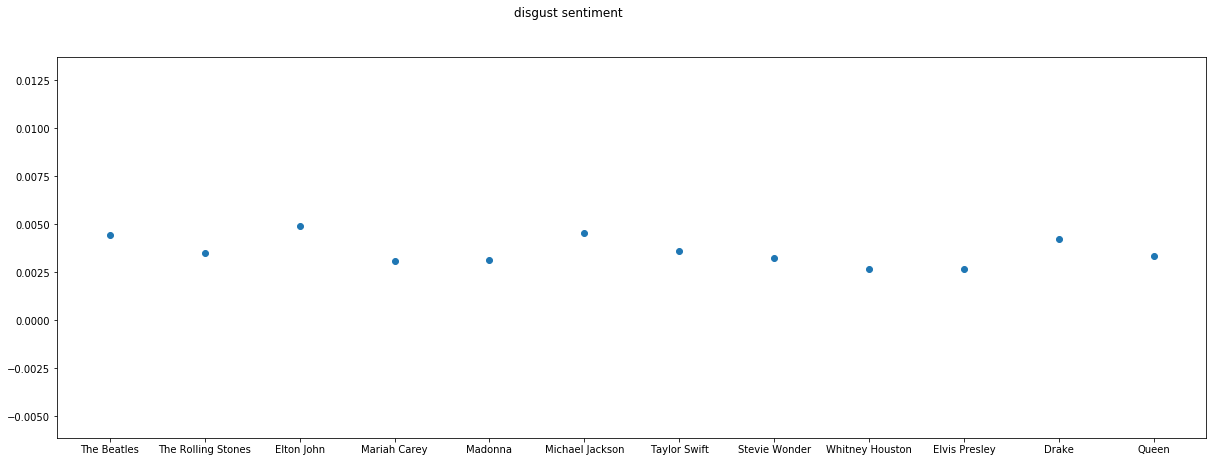

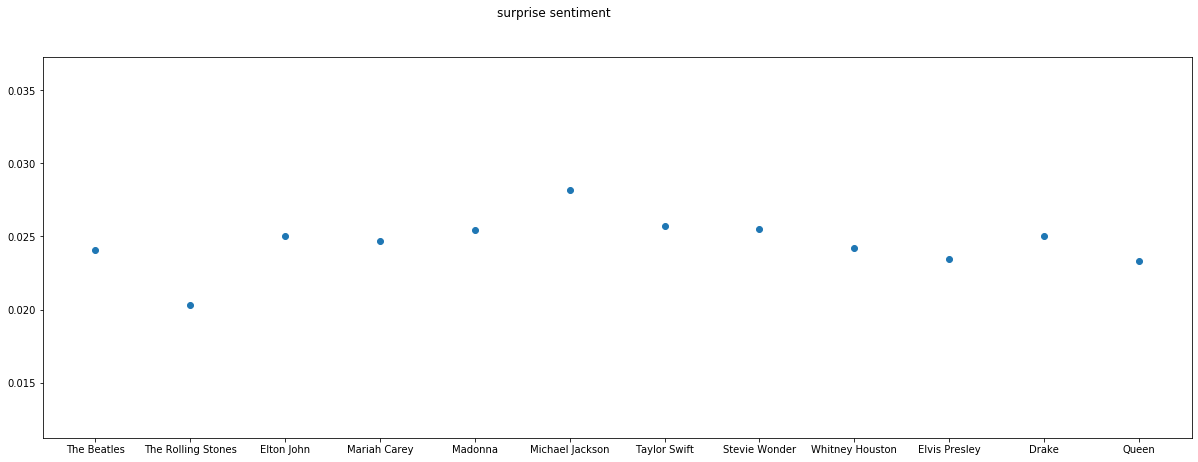

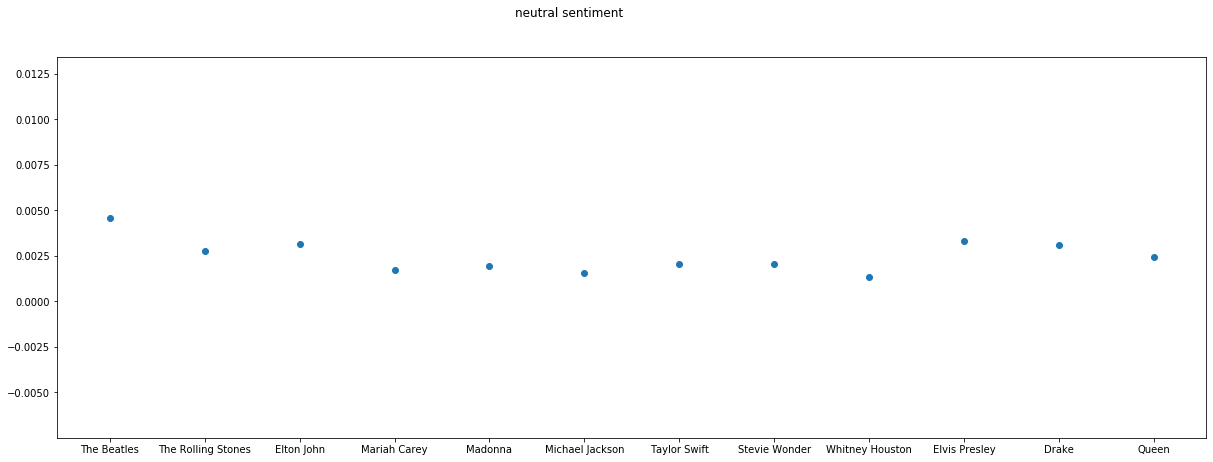

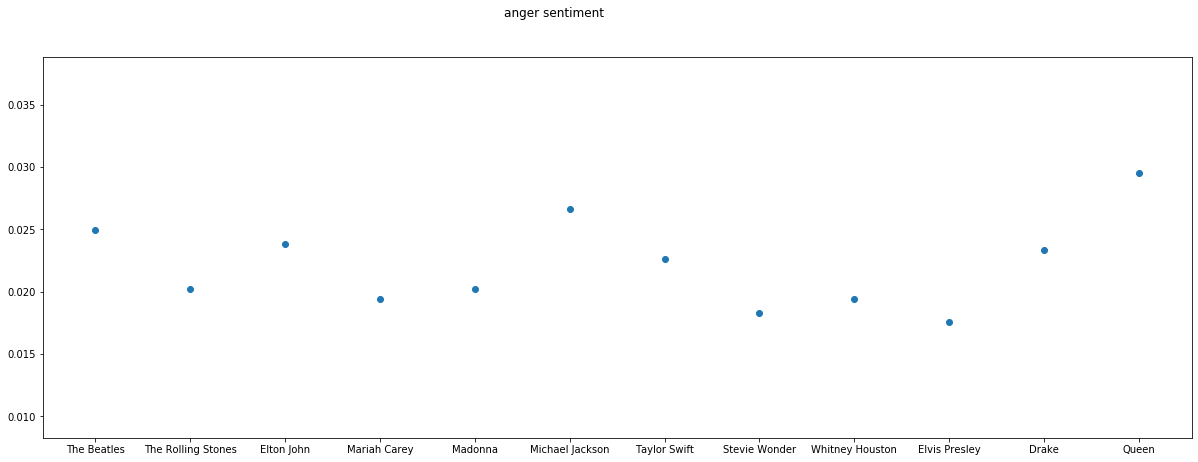

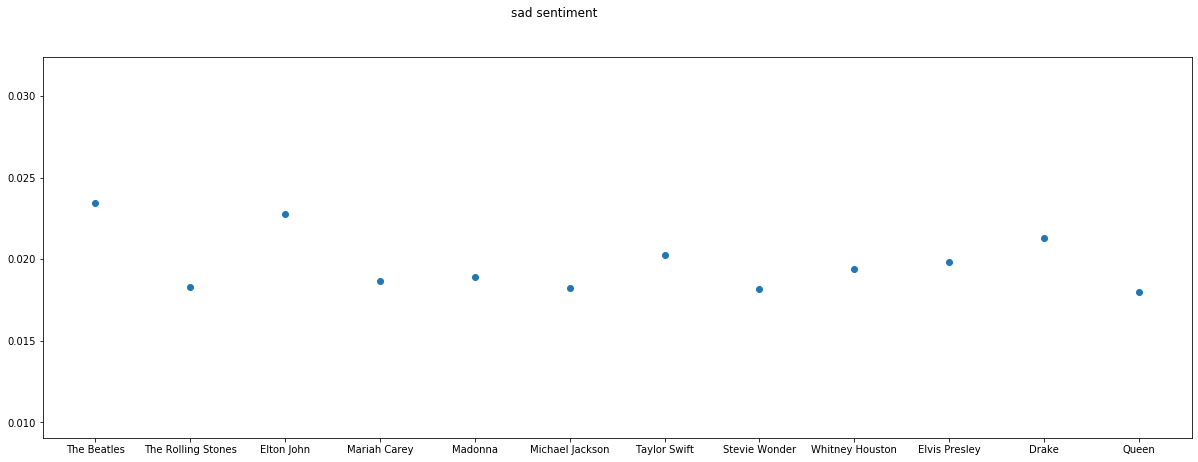

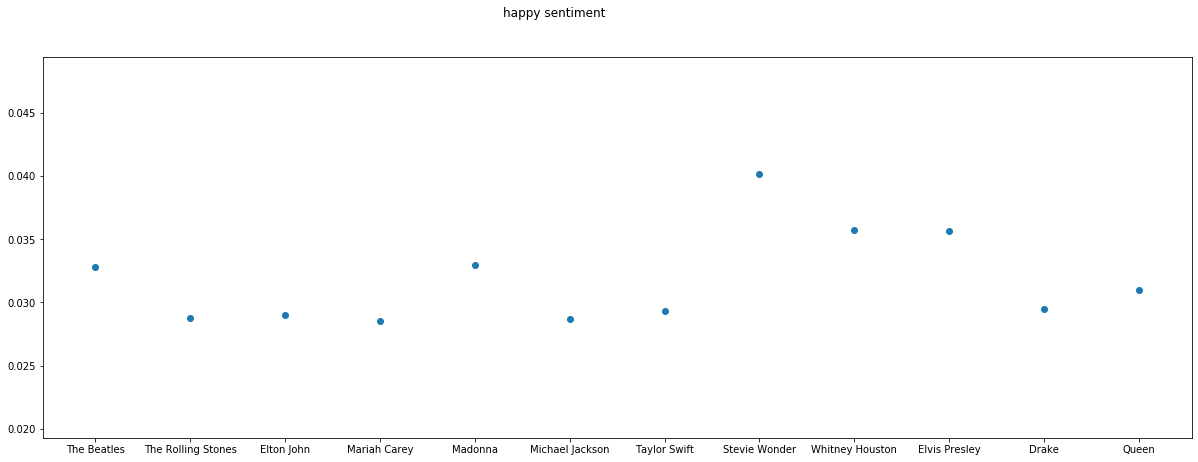

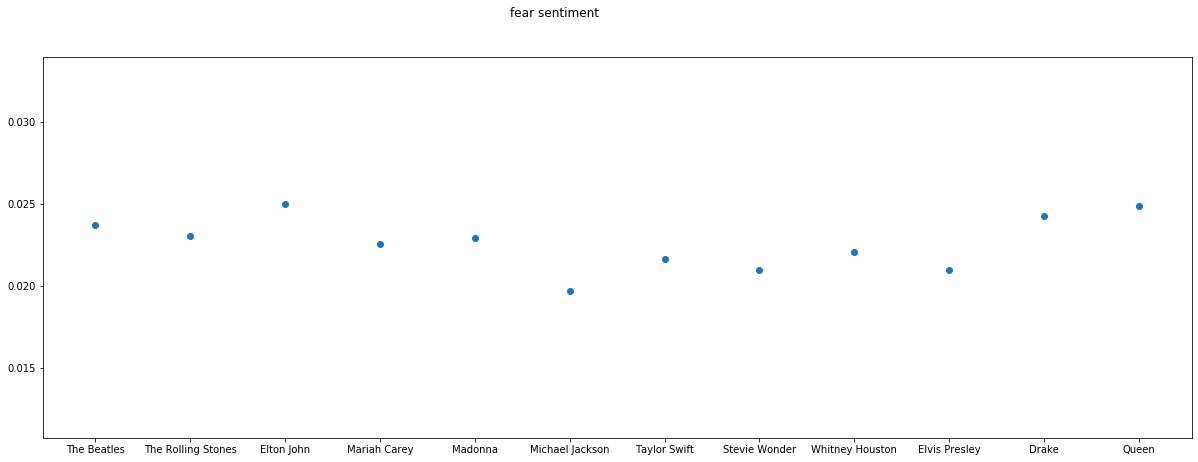

In [7]:
artists_names = ['The Beatles', 'The Rolling Stones', 'Elton John', 'Mariah Carey', 'Madonna', 'Michael Jackson', 'Taylor Swift', 'Stevie Wonder', 'Whitney Houston', 'Elvis Presley', 'Drake', 'Queen']

sentiment_counter = 0

for sentiment in sentiments_names_list:
    values = []
    for artist, sent_list in sentiments_dict.items(): 
        values.append(sent_list[sentiment_counter])
    plt.figure(figsize=(70, 7))
    plt.subplot(132)
    plt.suptitle(sentiment + " sentiment")
    plt.scatter(artists_names, values)
    plt.show()
    sentiment_counter+=1